## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Guido
- Apellido: Cambieri
- Legajo: 1415098

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [3]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

#from sklearn import svm
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_curve, auc
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier

In [5]:
london = pd.read_csv(r'C:\Users\guido\Documents\UTN\INGENIERIA INDUSTRIAL\CS de Datos\TP2\TP2_airbnb_london.csv')
london.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


In [6]:
print('Instancias, Columnas:', london.shape)

Instancias, Columnas: (51827, 9)


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london" 

In [7]:
london.describe()

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,51827.000000,51827.000000,51827.000000,51827.000000,51827.000000,51827.00000,51827.000000
mean,34936.408744,87.038783,2.346132,19.786328,1.282595,11.64970,124.942945
std,20474.524765,56.056634,1.583850,34.343645,1.435952,69.95429,132.436849
min,0.000000,0.000000,1.000000,1.000000,0.010000,1.00000,0.000000
25%,17141.500000,42.000000,1.000000,3.000000,0.280000,1.00000,0.000000
50%,34877.000000,75.000000,2.000000,7.000000,0.820000,1.00000,71.000000
75%,52206.000000,119.000000,3.000000,22.000000,1.780000,3.00000,249.000000
max,75192.000000,299.000000,13.000000,536.000000,15.560000,1034.00000,365.000000


In [8]:
london = london.drop(['Unnamed: 0'], axis=1)
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [9]:
london.isnull().sum(axis=0)

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [10]:
london[['neighbourhood', 'room_type']].dtypes

neighbourhood    object
room_type        object
dtype: object

In [11]:
london['neighbourhood'].unique()

array(['Haringey', 'Ealing', 'Islington', 'Tower Hamlets', 'Barnet',
       'Southwark', 'Newham', 'Hounslow', 'Camden',
       'Richmond upon Thames', 'Hackney', 'Hammersmith and Fulham',
       'Westminster', 'Waltham Forest', 'Brent', 'Lambeth',
       'Kensington and Chelsea', 'Wandsworth', 'Merton', 'Greenwich',
       'Bromley', 'Croydon', 'Lewisham', 'Enfield', 'City of London',
       'Barking and Dagenham', 'Hillingdon', 'Harrow', 'Redbridge',
       'Kingston upon Thames', 'Sutton', 'Havering', 'Bexley'],
      dtype=object)

In [12]:
london['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [13]:
## Genero las dummies para la variable neighbourhood, dentro de la variable neigh_dummies.
neigh_dummies = pd.get_dummies(london['neighbourhood'], drop_first=True)

Imprimir las dimensiones y primeras lineas de estas dummies

In [14]:
print('Instancias, Columnas:', neigh_dummies.shape)

Instancias, Columnas: (51827, 32)


In [15]:
neigh_dummies.head()

,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
## Genero las dummies para la variable room_type, dentro de la variable room_dummies.
room_dummies = pd.get_dummies(london['room_type'], drop_first=True)

Imprimir las dimensiones y primeras lineas de estas dummies

In [17]:
print('Instancias, Columnas:', room_dummies.shape)

Instancias, Columnas: (51827, 2)


In [18]:
room_dummies.head()

,Private room,Shared room
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


Joinear las variables dummies al dataset



In [19]:
#london = london.join(room_dummies,neigh_dummies)
london = pd.concat([london, neigh_dummies, room_dummies], axis=1)

In [20]:
london.columns

Index(['neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon',
       'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Private room', 'Shared room'],
      dtype='object')

##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"

In [21]:
y = np.array(london[["price"]])
x = london.drop(['price', 'neighbourhood','room_type'], axis=1)

##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=23)

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(36278, 39) (36278, 1) (15549, 39) (15549, 1)


##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".


In [ ]:
#scaler = preprocessing.StandardScaler().fit(xtrain)

In [23]:
scaler = preprocessing.StandardScaler()

In [24]:
xtrain_scal= scaler.fit_transform(xtrain)
xtrain_scal.shape

(36278, 39)

In [25]:
xtest_scal= scaler.fit_transform(xtest)
xtest_scal.shape

(15549, 39)

##### **Objetivo 9**
Crear un modelo lineal y entrenarlo para nuestro dataset.

Obtener las predicciones y el "mean_squared_error" para el test set.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [27]:
linear_model = LinearRegression().fit(xtrain_scal, ytrain)

Raíz del error cuadrático medio en Train: 39
Raíz del error cuadrático medio en Test: 39


D:\Users\guido\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\guido\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


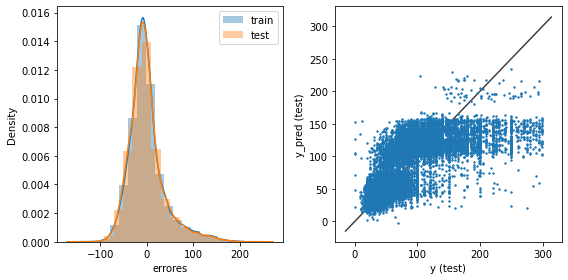

In [28]:
y_train_pred = linear_model.predict(xtrain_scal)
y_test_pred = linear_model.predict(xtest_scal)
    
rmse_train_bmk = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_test_bmk = np.sqrt(mean_squared_error(ytest, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_bmk:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_bmk:,.0f}'.replace(',','.'))
        
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(ytrain - y_train_pred, bins = 20, label = 'train')
sns.distplot(ytest - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(ytest,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [29]:
scores = cross_val_score(linear_model, xtrain_scal, ytrain, scoring='neg_mean_squared_error', cv=5)

In [30]:
list(np.sqrt(scores*(-1)))

[38.61584844139245,
 39.45851860401447,
 40.30610695670665,
 38.498872456557734,
 39.696634848902285]

In [31]:
scores = cross_val_score(linear_model, xtest_scal, ytest, scoring='neg_mean_squared_error', cv=5)

In [32]:
list(np.sqrt(scores*(-1)))

[38.26102695300647,
 39.70805330224221,
 39.78303678802625,
 37.55382340609143,
 39.792035416420525]

##### **Objetivo 10**
Crear un SVM Regressor y un GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [33]:
from sklearn.svm import SVR

In [34]:
#Uso un SVR porque no es un problema de clasificacion si no de regresion 
#Creamos el modelo Support Vector Regressor (SVR)
svr = SVR()

# Hyperparametros
parameters = {'kernel':('linear', 'rbf', 'poly'),
              'C':[1, 10, 100],
              'gamma':['scale', 'auto', 0.0001]}
# 
regressor = GridSearchCV(svr, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   scoring ='neg_mean_squared_error',
                   verbose=1)
regressor.fit(xtrain_scal, ytrain.ravel())

print(regressor.best_params_)
print(-regressor.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
1557.2696563084721


##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set.

In [42]:
svr1 = SVR(kernel='rbf', C=100, gamma='scale').fit(xtrain_scal,ytrain)

D:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Raíz del error cuadrático medio en Train: 39
Raíz del error cuadrático medio en Test: 39


MemoryError: Unable to allocate 9.81 GiB for an array with shape (36278, 36278) and data type float64

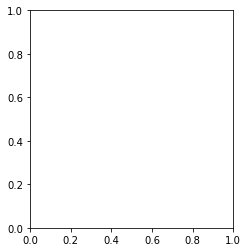

In [43]:
y_train_pred = svr1.predict(xtrain_scal)
y_test_pred = svr1.predict(xtest_scal)
    
rmse_train_bmk = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_test_bmk = np.sqrt(mean_squared_error(ytest, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_bmk:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_bmk:,.0f}'.replace(',','.'))
        
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(ytrain - y_train_pred, bins = 20, label = 'train')
sns.distplot(ytest - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(ytest,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layo

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

In [44]:
#Creamos el modelo Support Vector Regressor (SVR)
svr = SVR()

# Cambio algunos de los hiperparametros
parameters = {'kernel':('linear', 'rbf', 'poly'),
              'C':[0.01, 0.1, 1],
              'gamma':['scale', 'auto', 0.001]}
# 
regressor = GridSearchCV(svr, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   scoring ='neg_mean_squared_error',
                   verbose=1)
regressor.fit(xtrain_scal, ytrain.ravel())

print(regressor.best_params_)
print(-regressor.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
1639.3995297158103


In [48]:
svr2 = SVR(kernel='linear', C=1, gamma='scale').fit(xtrain_scal,ytrain)

D:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Raíz del error cuadrático medio en Train: 40
Raíz del error cuadrático medio en Test: 40


MemoryError: Unable to allocate 9.81 GiB for an array with shape (36278, 36278) and data type float64

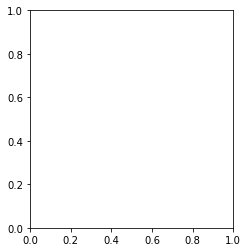

In [49]:
y_train_pred = svr2.predict(xtrain_scal)
y_test_pred = svr2.predict(xtest_scal)
    
rmse_train_bmk = np.sqrt(mean_squared_error(ytrain, y_train_pred))
rmse_test_bmk = np.sqrt(mean_squared_error(ytest, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_bmk:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_bmk:,.0f}'.replace(',','.'))
        
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(ytrain - y_train_pred, bins = 20, label = 'train')
sns.distplot(ytest - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(ytest,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()

In [ ]:
# En coclusion no es neceario, al menos con estos hiperparametros, usar SVR, se desperdicia mucho procesamiento.
# El MSE antes de usarlos es de 39, con la regresion lineal.
# Luego el MSE con la primer prueba fue de 39 y 40. Es decir no mejoro el MSE.